In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
#from google.colab.patches import cv2_imshow

def imshow(img):
    plt.imshow(img, cmap = plt.cm.gray)
    plt.show()

In [3]:
img = cv2.imread('labeling/source/1_0.png')

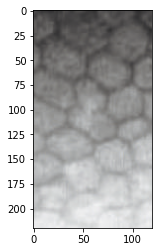

In [4]:
imshow(img)

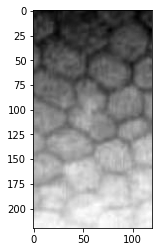

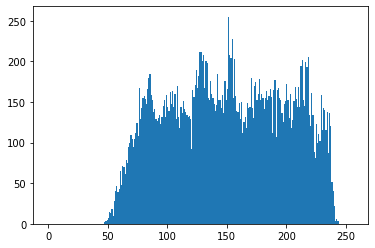

In [5]:
grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(grayscaled)
plt.hist(grayscaled.ravel(),256,[0,256]); plt.show()

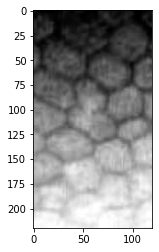

In [6]:
equalized = cv2.equalizeHist(grayscaled)
imshow(equalized)

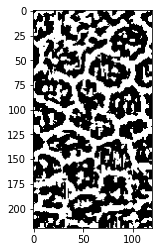

In [7]:
thresholded = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21,1)
imshow(thresholded)

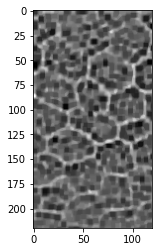

In [8]:
laplacian = cv2.Laplacian(grayscaled, cv2.CV_64F, ksize=11)
closing = cv2.morphologyEx(laplacian, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8))
erode = cv2.morphologyEx(closing,cv2.MORPH_ERODE, np.ones((2, 2), np.uint8))
opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, np.ones((2, 2), np.uint8))
imshow(opening)

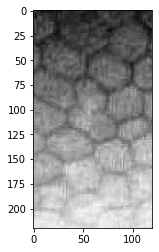

In [9]:
def sharpen(x):
    kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
    return cv2.filter2D(src=x, ddepth=-1, kernel=kernel)
image_sharp = sharpen(grayscaled)
imshow(image_sharp)

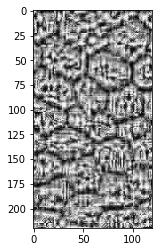

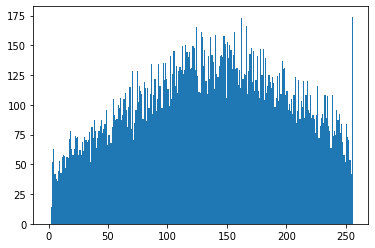

In [10]:
clahe = cv2.createCLAHE(clipLimit=0.0, tileGridSize=(30,30))
equalized_tiles = clahe.apply(image_sharp)
imshow(equalized_tiles)
plt.hist(equalized_tiles.ravel(),256,[0,256]); plt.show()

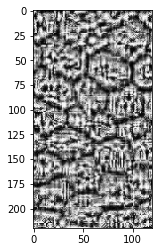

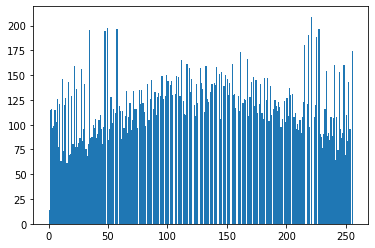

In [11]:
eqeq = cv2.equalizeHist(equalized_tiles)
imshow(eqeq)
plt.hist(eqeq.ravel(),256,[0,256]); plt.show()

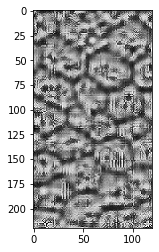

In [12]:
x=cv2.bilateralFilter(eqeq,8, 150,150)
imshow(sharpen(x))

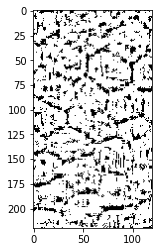

In [13]:
_,t0 = cv2.threshold(eqeq, 50,255,  cv2.THRESH_BINARY)
imshow(t0)

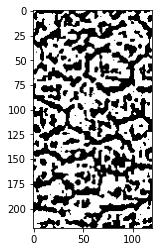

In [14]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
x = cv2.erode(t0,kernel,iterations = 1)
x = cv2.medianBlur(x,3)
imshow(x)

# hey
comment ça va 
* a
* b
test markdown !

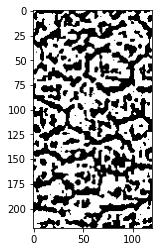

In [15]:
#kernel=np.ones((2,2), np.uint8)
kernel = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0],
], np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
i1=cv2.morphologyEx(t0, cv2.MORPH_CLOSE, kernel)
imshow(x)

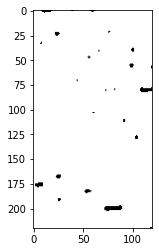

In [16]:
i2 = cv2.medianBlur(i1,7)
imshow(i2)

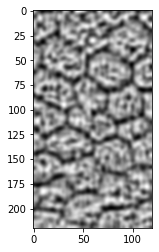

In [17]:
blurred = cv2.GaussianBlur(equalized_tiles, (9,9), 0)
imshow(blurred)

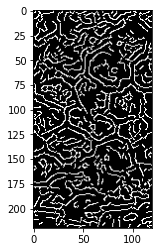

In [18]:
edges = cv2.Canny(blurred,130,160)
imshow(edges)

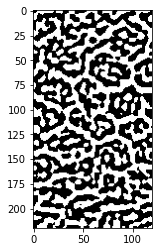

In [19]:
t2 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 17,1)
imshow(t2)

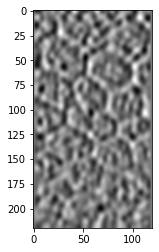

In [20]:
edge2 = cv2.Sobel(equalized_tiles,ddepth=cv2.CV_64F,dx=1,dy=0, ksize=31)
imshow(edge2)

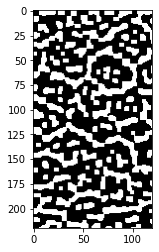

In [21]:
x = cv2.morphologyEx(t2, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))
x = cv2.morphologyEx(x, cv2.MORPH_CLOSE, np.ones((2,2), np.uint8))
imshow(x)

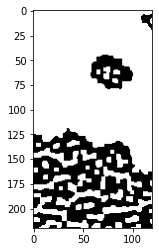

In [22]:
h, w = x.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(x, mask, (1,1), 255)
imshow(x)

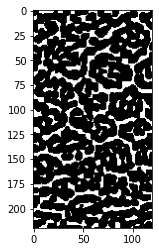

In [23]:
kernel = np.ones((3,3))
x = cv2.erode(t2,kernel,iterations = 1)
x = cv2.morphologyEx(x, cv2.MORPH_CLOSE, np.ones((2,2)))
#x = cv2.erode(t2,np.ones((2,2)), iterations=1)
imshow(x)
morph5=x

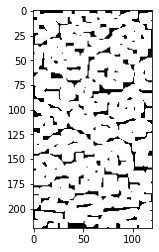

In [24]:
x=morph5
b2 = cv2.GaussianBlur(x, (3,3), 0)
b2 = cv2.erode(b2, np.ones((2,2) ))
_, b2 = cv2.threshold(b2, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
y = cv2.morphologyEx(b2, cv2.MORPH_OPEN, np.ones((7,7)))
imshow(y)

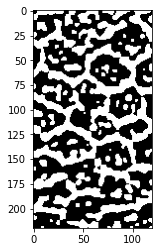

In [25]:
x=morph5
x = cv2.erode(blurred,np.ones((2,2)), iterations=1)
_, gt1 = cv2.threshold(x, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow(gt1)

# good segmentation
it has nice separation, but the borders are a bit imprecise

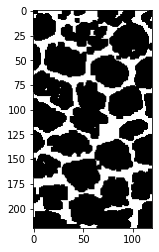

In [81]:
seg2 = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 51,0)
seg2 = cv2.morphologyEx(seg2, cv2.MORPH_ERODE, np.ones((4,4), np.uint8))
imshow(seg2)

In [82]:
def hist(img):
    histogram, bin_edges = np.histogram(img, bins=256, range=(0, 256))
    plt.plot(bin_edges[0:-1], histogram)
    plt.show()

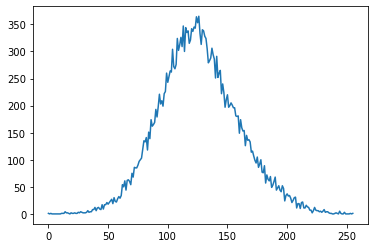

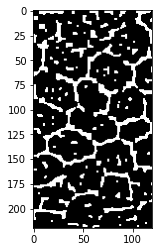

In [106]:
_laplacian = cv2.Laplacian(grayscaled, cv2.CV_64F, ksize=11)
laplacian = _laplacian - _laplacian.min()
laplacian = laplacian / laplacian.max() * 255
laplacian = np.uint8(laplacian)
hist(laplacian)
a,tr =   cv2.threshold(laplacian,140,255,cv2.THRESH_BINARY)
laplacian = tr
closing = cv2.morphologyEx(laplacian, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8))
erode = cv2.morphologyEx(closing, cv2.MORPH_ERODE, np.ones((2, 2), np.uint8))
opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, np.ones((2, 2), np.uint8))

imshow(opening)